# **Bank Customer Segmentation**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# impoting the dataset
customer_df = pd.read_csv('/content/drive/MyDrive/ML Projects/Customer-Segmentation/Marketing_data.csv')
customer_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# analysing the dataset
customer_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# locating the missing values
customer_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
# replacing the missing values with th mean of that respective column

customer_df.loc[(customer_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = customer_df['MINIMUM_PAYMENTS'].mean()
customer_df.loc[(customer_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = customer_df['CREDIT_LIMIT'].mean()

In [4]:
# dropping CUSTOMER_ID column
customer_df.drop("CUST_ID", axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

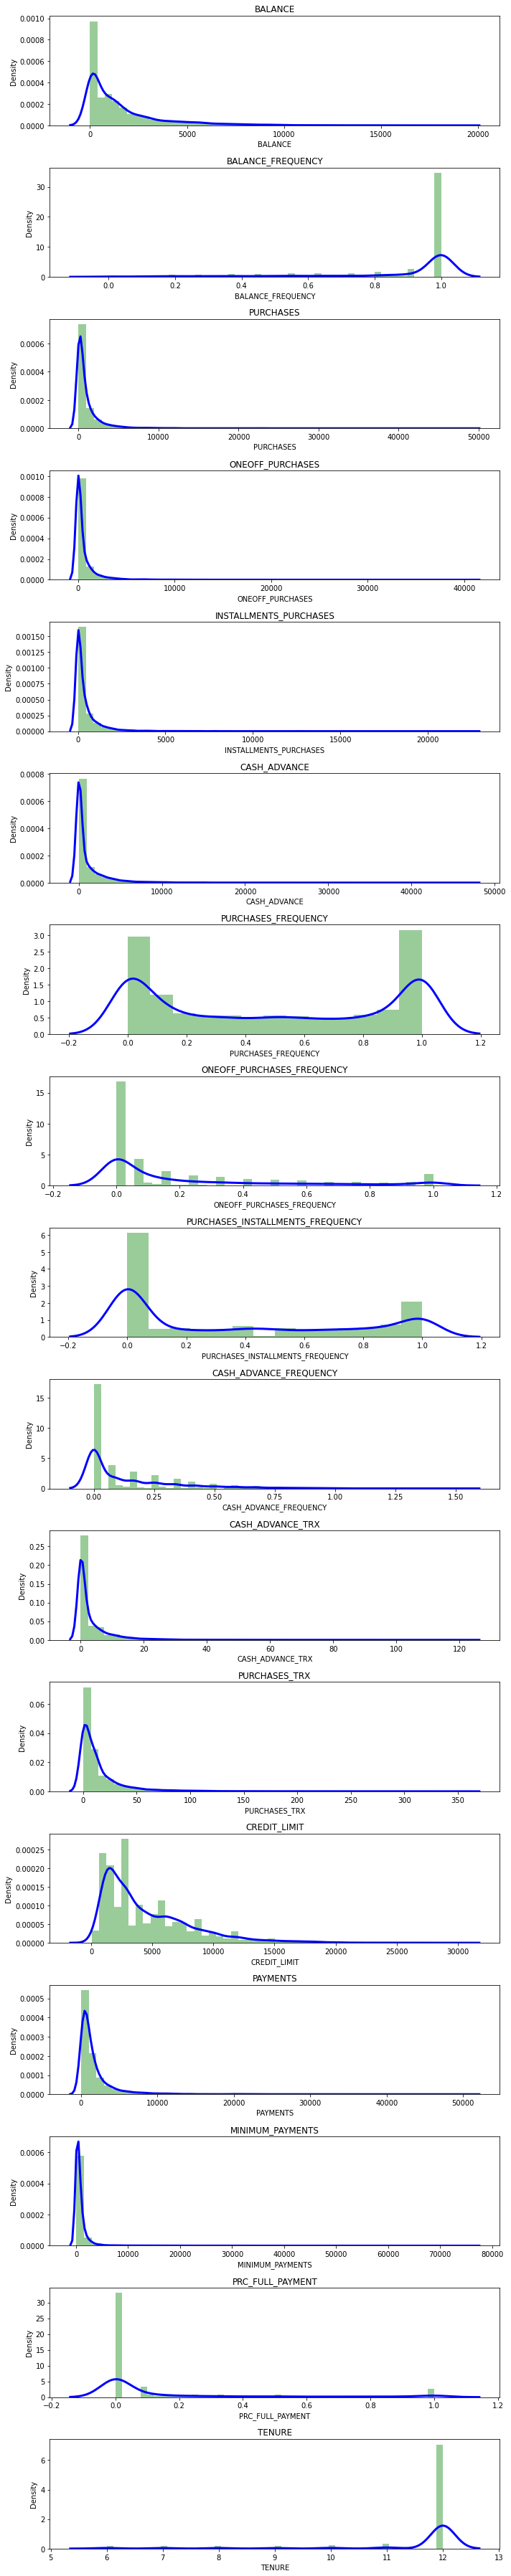

In [ ]:
# PLotting the KDE and histogram for each column/feature of the dataset
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 

plt.figure(figsize=(10,50))
for i in range(len(customer_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(customer_df[customer_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g", "label": "Histogram"})
  plt.title(customer_df.columns[i])

plt.tight_layout()

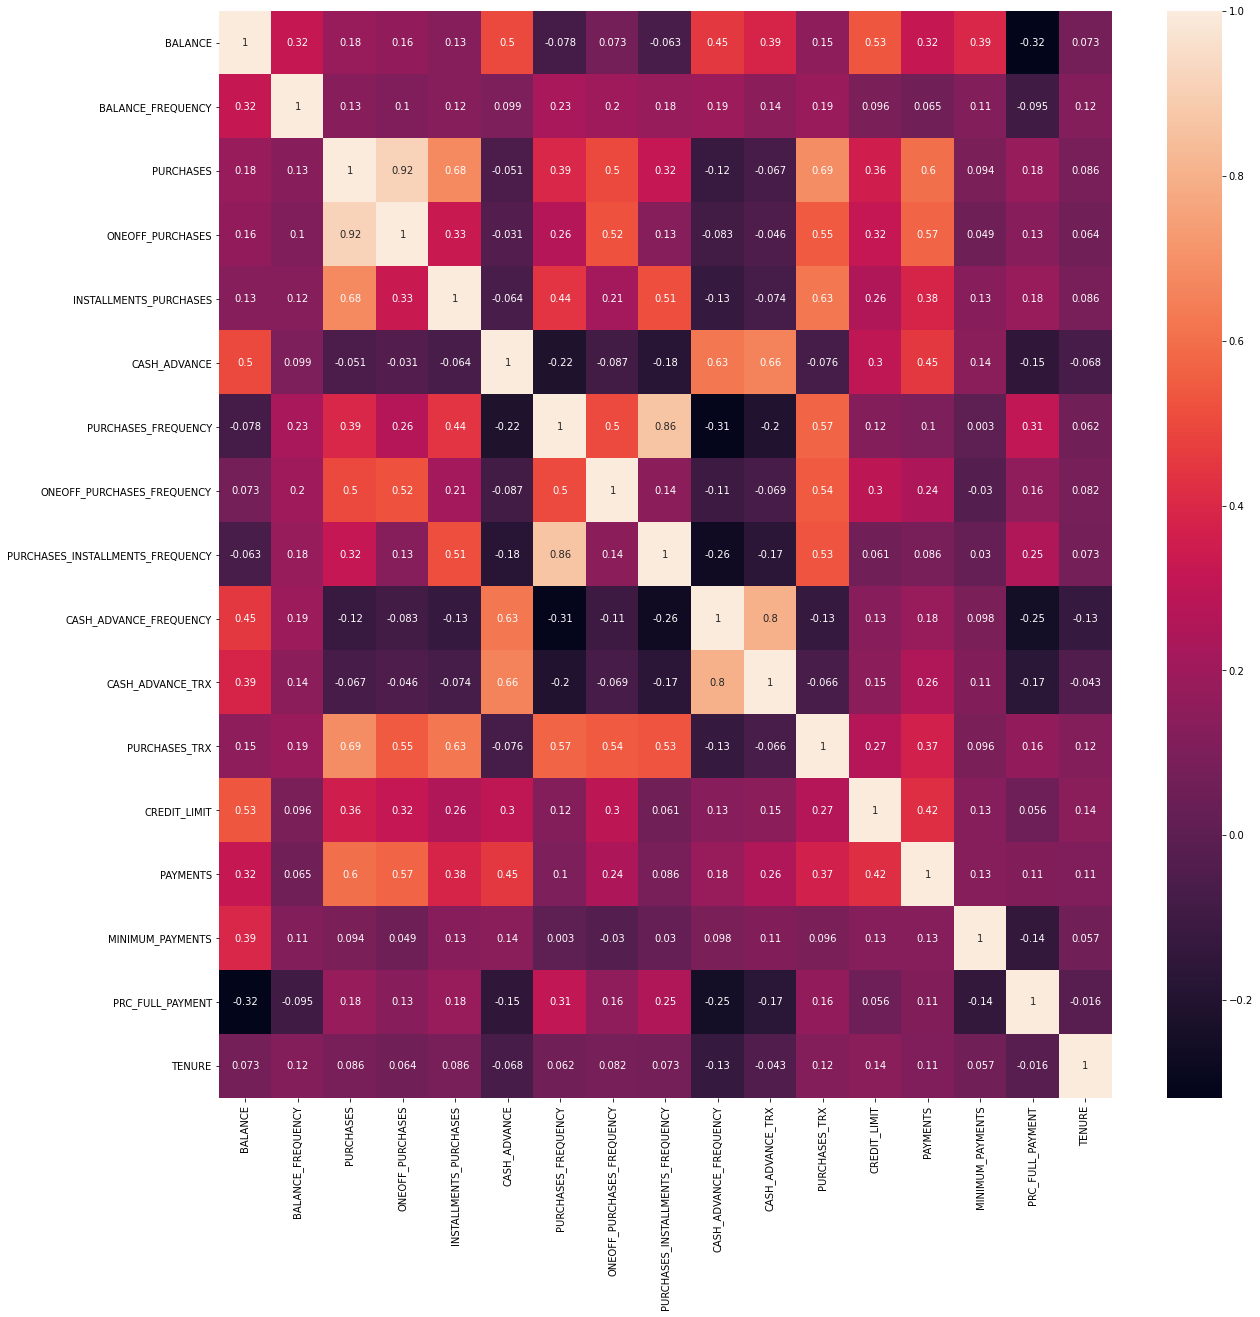

In [ ]:
# visualising the correlation among different features

plt.figure(figsize=(20, 20))
corr = customer_df.corr()
sns.heatmap(corr, annot = True)

In [5]:
# scaling the dataset

ss = StandardScaler()
customer_df_scaled = ss.fit_transform(customer_df) 

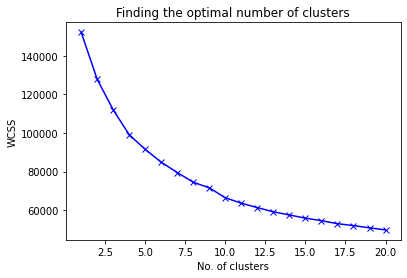

In [ ]:
# determining the optimal number of clusters for K-means

number_of_clusters = range(1, 21)
wcss = []

for i in number_of_clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(customer_df_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(number_of_clusters, wcss, 'bx-')
plt.title('Finding the optimal number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS') 
plt.show()

optimal number of clusters obtained = 10


## **Applying KMeans**

In [6]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(customer_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(10, 17)

In [ ]:
# displaying the 10 cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [customer_df.columns])
cluster_centers    

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.702150,-2.161621,-0.311119,-0.235902,-0.302124,-0.322343,-0.556647,-0.447344,-0.437349,-0.522655,-0.380142,-0.419983,-0.172841,-0.202484,-0.256243,0.285538,0.200832
1,-0.178164,0.389605,0.447713,0.587137,-0.020216,-0.345912,0.951050,1.898977,0.086828,-0.427515,-0.338840,0.526673,0.366582,0.075098,-0.168341,0.427827,0.260103
2,1.770459,0.325991,0.023826,0.032864,-0.004360,4.119744,-0.200529,0.046410,-0.154176,2.563205,3.824476,0.015008,1.320404,2.810150,0.520712,-0.178212,0.022150
3,-0.385069,0.329347,-0.030070,-0.242087,0.373474,-0.368306,1.013110,-0.383281,1.230891,-0.481984,-0.365791,0.196564,-0.265562,-0.214702,-0.109090,0.344443,0.254974
4,1.180370,0.465753,-0.056179,-0.284877,0.389819,-0.031301,0.036912,-0.555727,0.276551,-0.251168,-0.083087,0.148826,-0.069372,-0.136715,10.521058,-0.525551,0.292749
5,1.391629,0.405657,-0.299786,-0.216895,-0.310407,1.170408,-0.622074,-0.316479,-0.534760,1.519656,1.184149,-0.369724,0.764016,0.231595,0.306022,-0.447942,0.115706
6,-0.106614,0.395365,-0.354689,-0.241071,-0.395637,-0.185174,-0.833713,-0.393610,-0.738025,-0.025457,-0.121991,-0.478602,-0.388704,-0.284657,-0.081820,-0.452992,0.279339
7,0.855825,0.469033,2.284862,1.801529,2.092901,-0.202110,1.162972,1.631620,1.210686,-0.312911,-0.216098,2.773057,1.238103,1.253009,0.264345,0.312775,0.332548
8,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
9,-0.345691,-0.351380,-0.291013,-0.218503,-0.286299,0.055945,-0.198609,-0.288448,-0.220308,0.293405,-0.013074,-0.387756,-0.575688,-0.394504,-0.210522,0.021042,-3.222184


In [ ]:
cluster_centers = ss.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [customer_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,103.008548,0.365203,338.494003,200.888007,137.860979,302.902699,0.266941,0.069006,0.190624,0.030556,0.654639,4.270619,3865.583715,1146.973776,267.041904,2.372295e-01,11.786082
1,1193.642531,0.969565,1959.751185,1566.964692,392.786493,253.476636,0.872053,0.768959,0.398945,0.049594,0.936493,27.800948,5828.224903,1950.544393,471.895777,2.788468e-01,11.865403
2,5249.535662,0.954495,1054.109834,646.985083,407.124751,9618.166574,0.409869,0.216303,0.303164,0.648068,29.348066,15.082873,9298.618785,9868.251409,2077.704170,1.015906e-01,11.546961
3,762.986963,0.955290,938.958945,190.622469,748.795983,206.516872,0.896960,0.088118,0.853625,0.038694,0.752572,19.595679,3528.225413,1111.602269,609.976071,2.544584e-01,11.858539
4,4021.314923,0.987603,883.176591,119.600227,763.576364,913.231699,0.505165,0.036674,0.474346,0.084883,2.681818,18.409091,4242.045455,1337.367541,25383.088762,-8.326673e-17,11.909091
5,4461.032248,0.973367,362.708235,232.435975,130.370873,3433.272000,0.240682,0.108046,0.151910,0.439243,11.329777,5.519884,7274.252711,2403.588814,1577.378289,2.269926e-02,11.672163
6,1342.567560,0.970929,245.405808,192.308444,53.298371,590.552386,0.155741,0.085036,0.071127,0.130050,2.416328,2.813566,3080.185486,909.090256,673.527622,2.122237e-02,11.891145
7,3345.802855,0.988380,5884.847412,3582.606918,2303.652259,555.036777,0.957108,0.689201,0.845595,0.072528,1.774118,83.637647,8999.176471,5360.480720,1480.251165,2.451960e-01,11.962353
8,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,4.784091e-01,11.933333
9,844.948474,0.794032,381.450016,229.767427,152.171189,1096.191115,0.410639,0.116408,0.276881,0.193858,3.159609,5.071661,2399.860667,591.094647,373.595014,1.598689e-01,7.205212


In [7]:
# appending each label to its corresponding customer

customer_df_clustered = pd.concat([customer_df, pd.DataFrame({'CLUSTER NO.' : labels})], axis = 1)
customer_df_clustered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER NO.
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


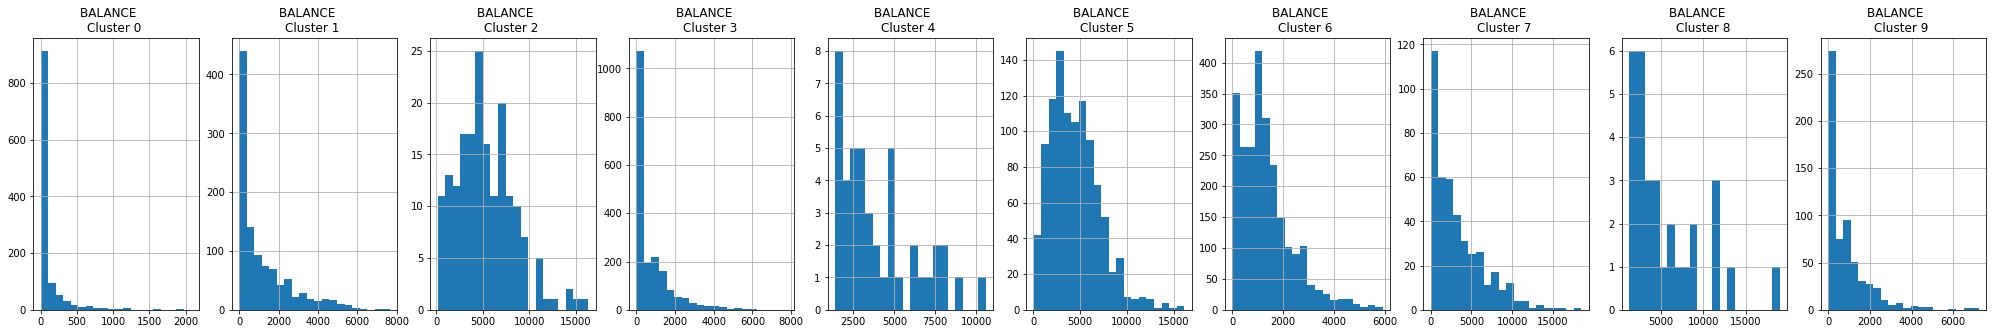

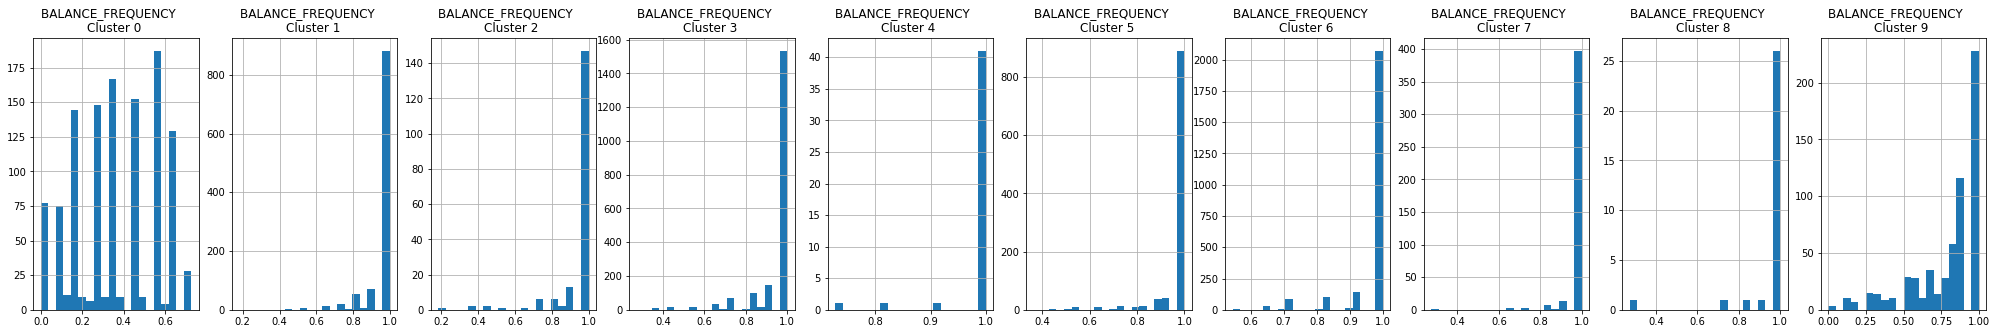

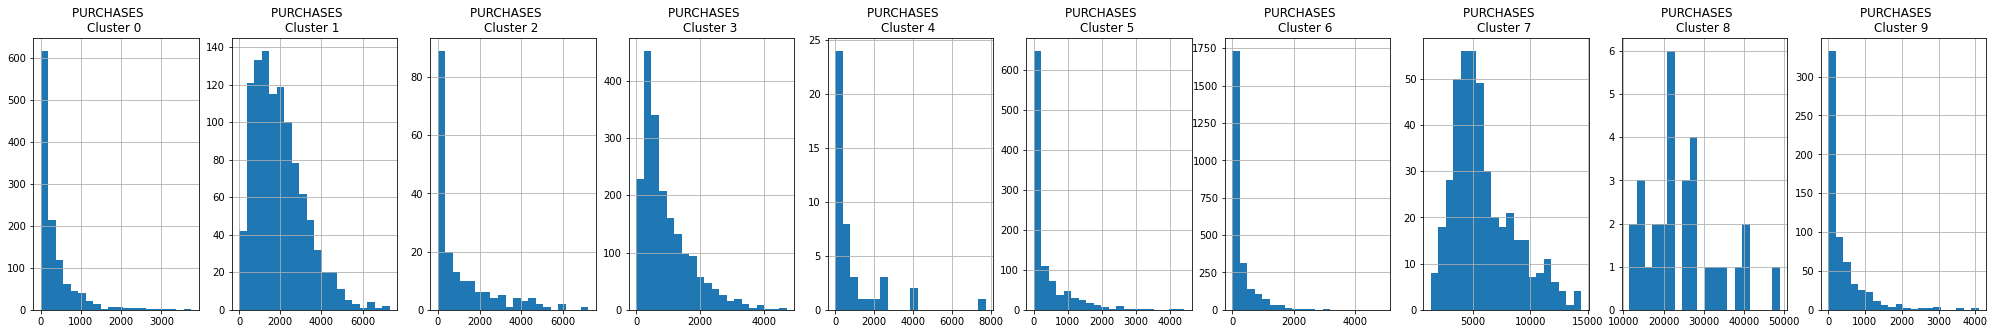

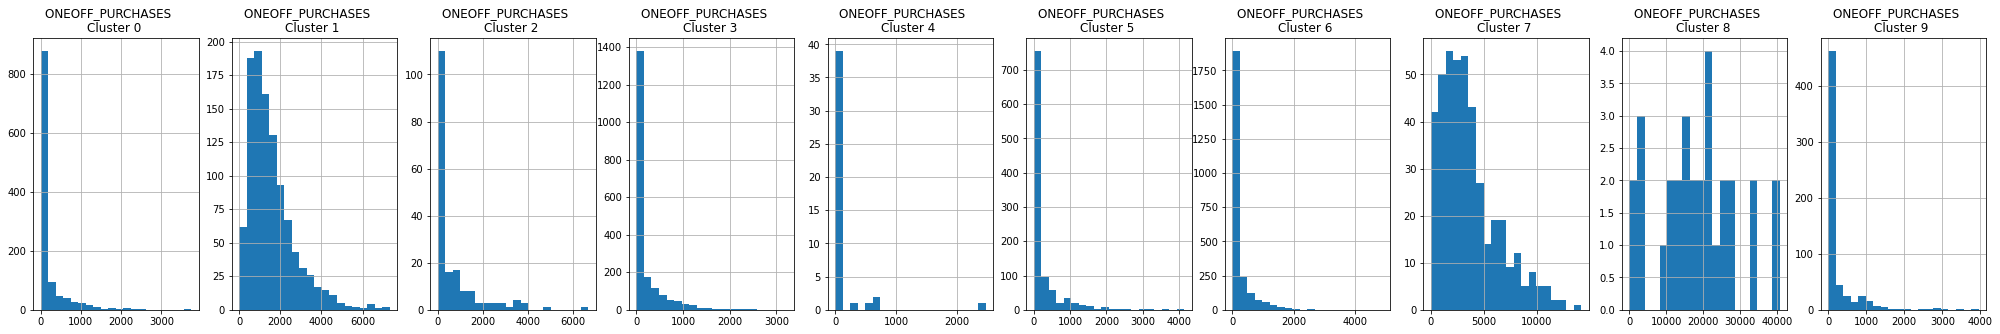

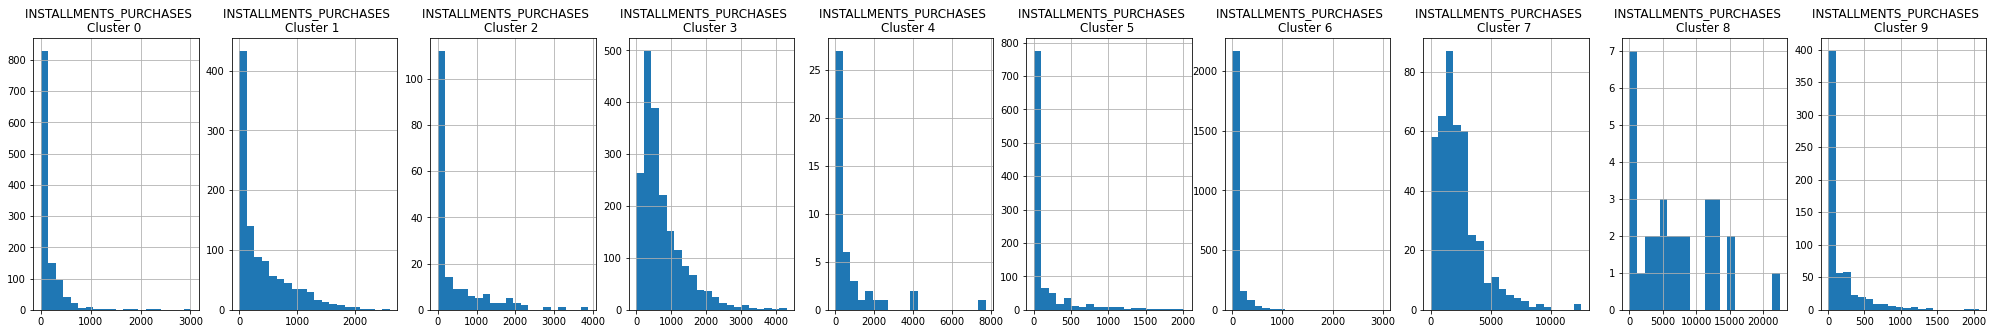

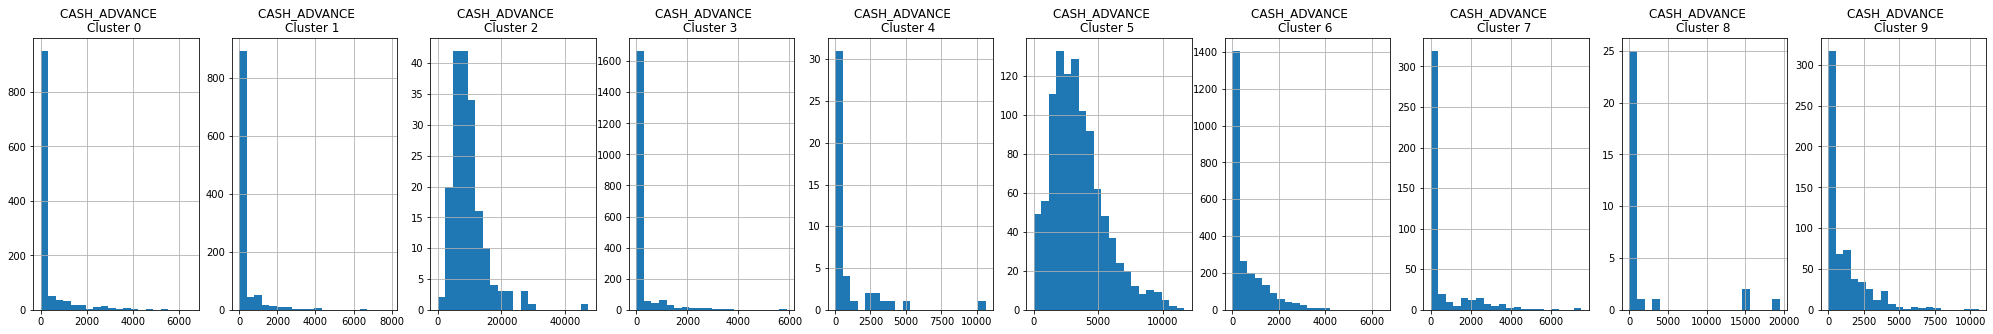

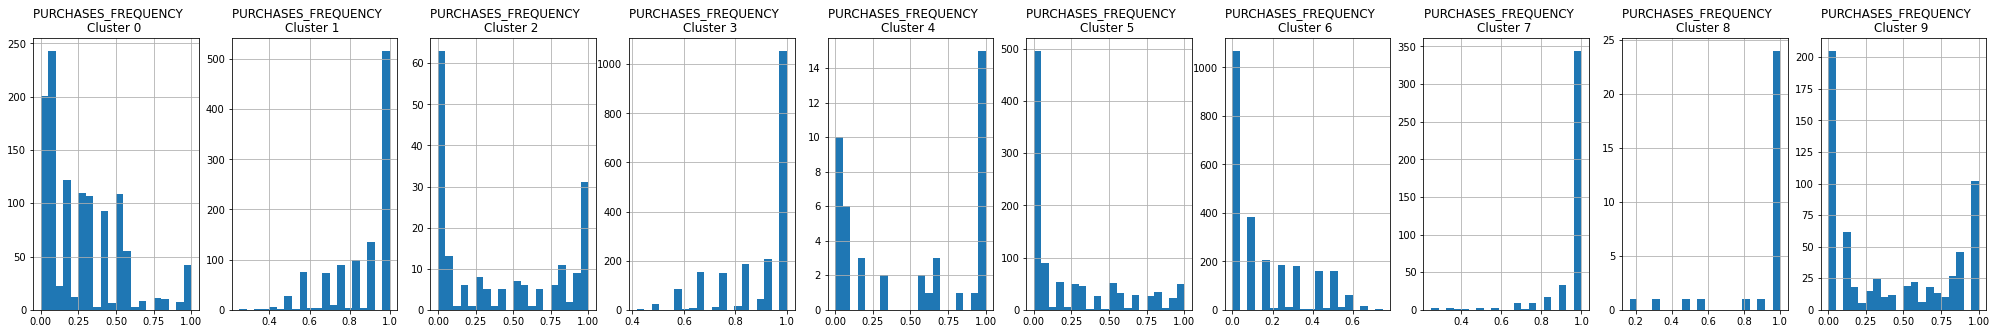

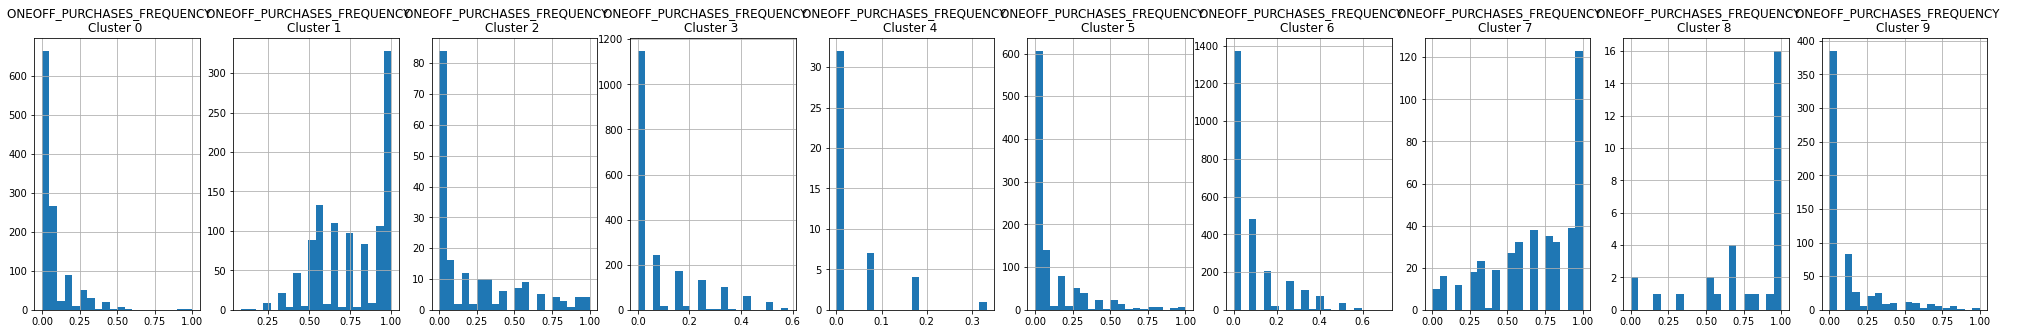

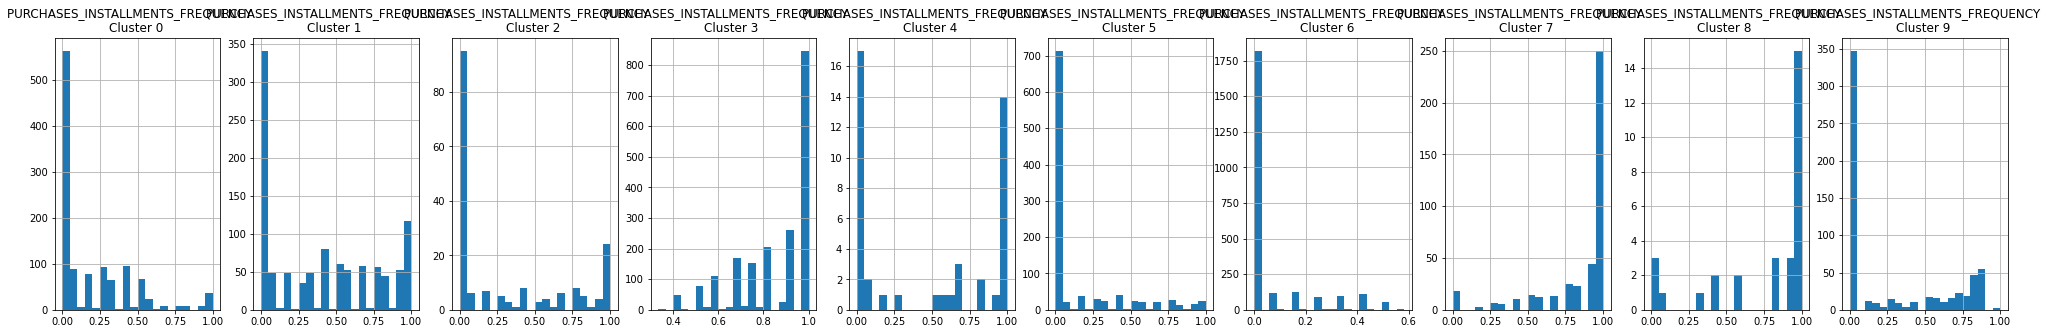

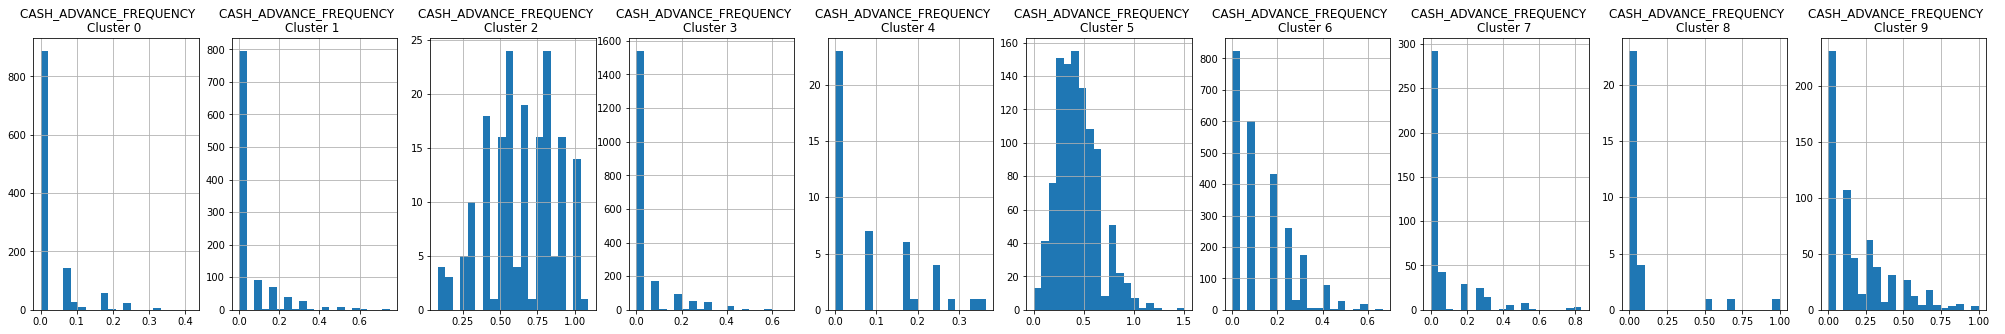

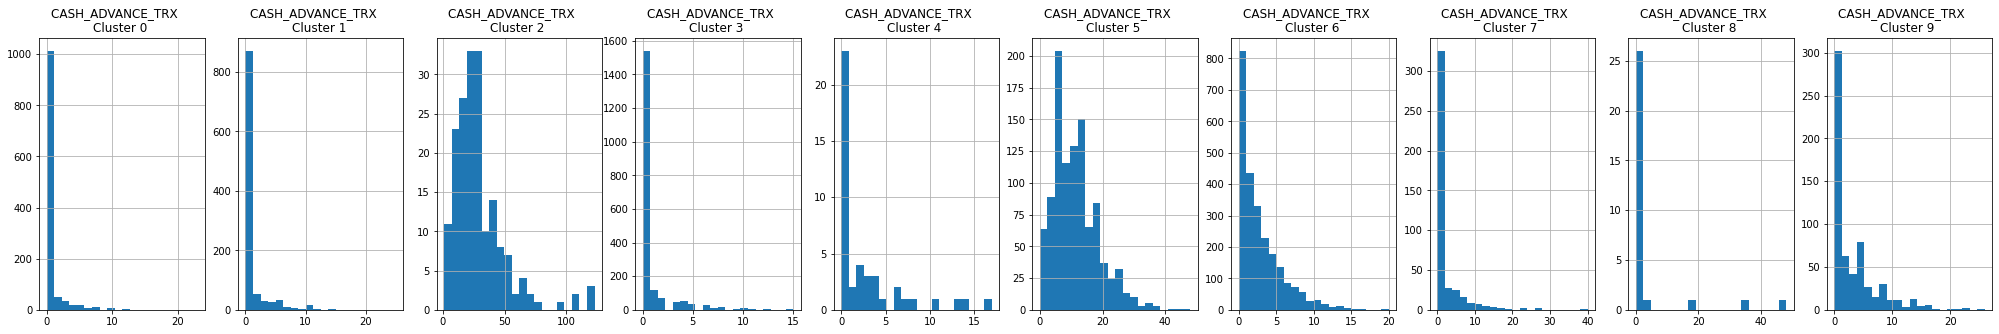

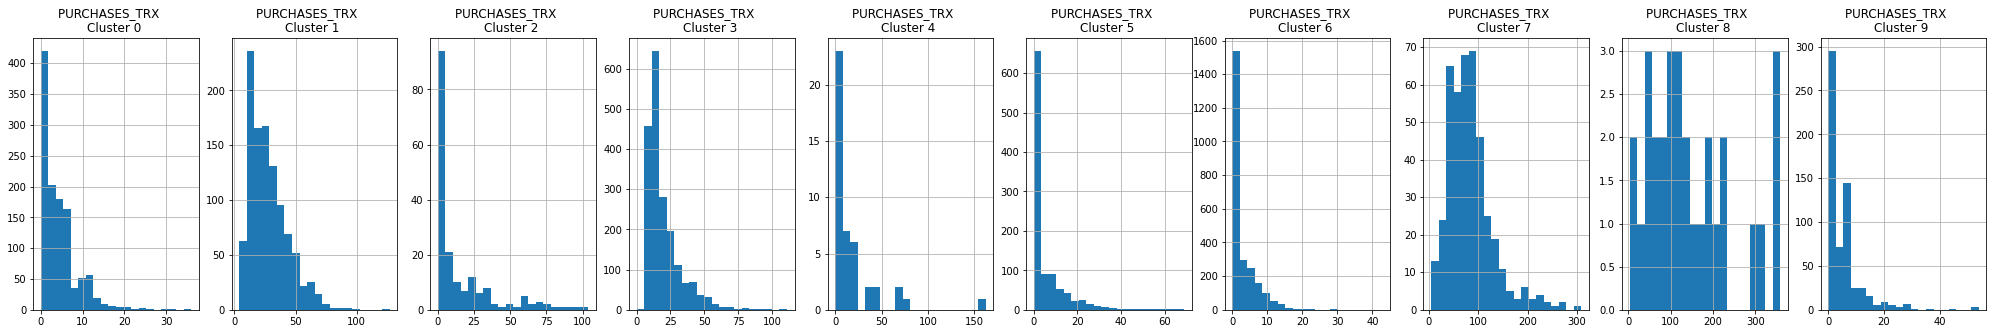

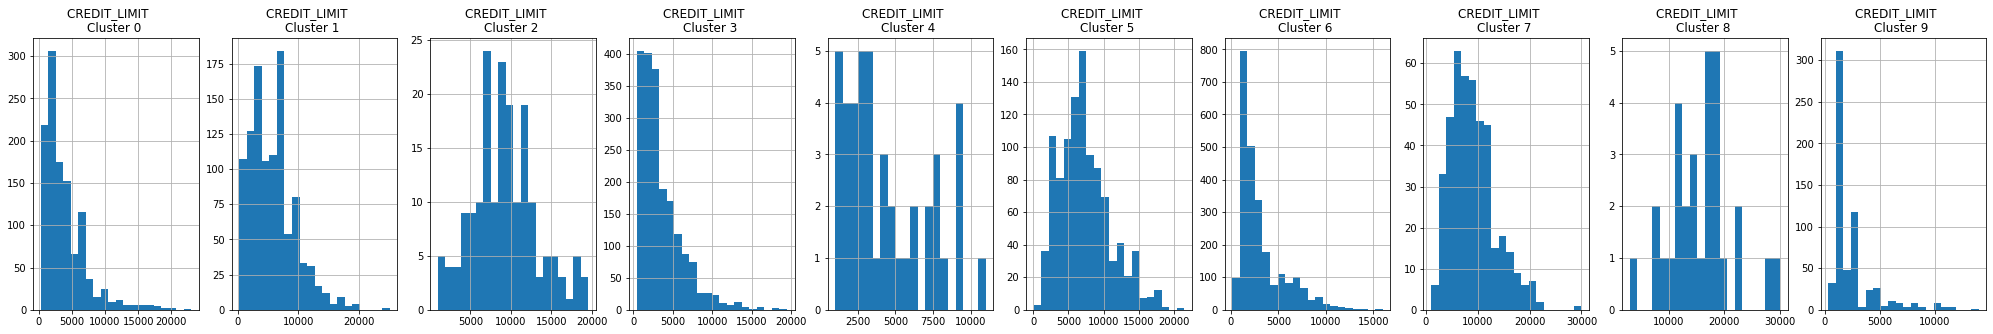

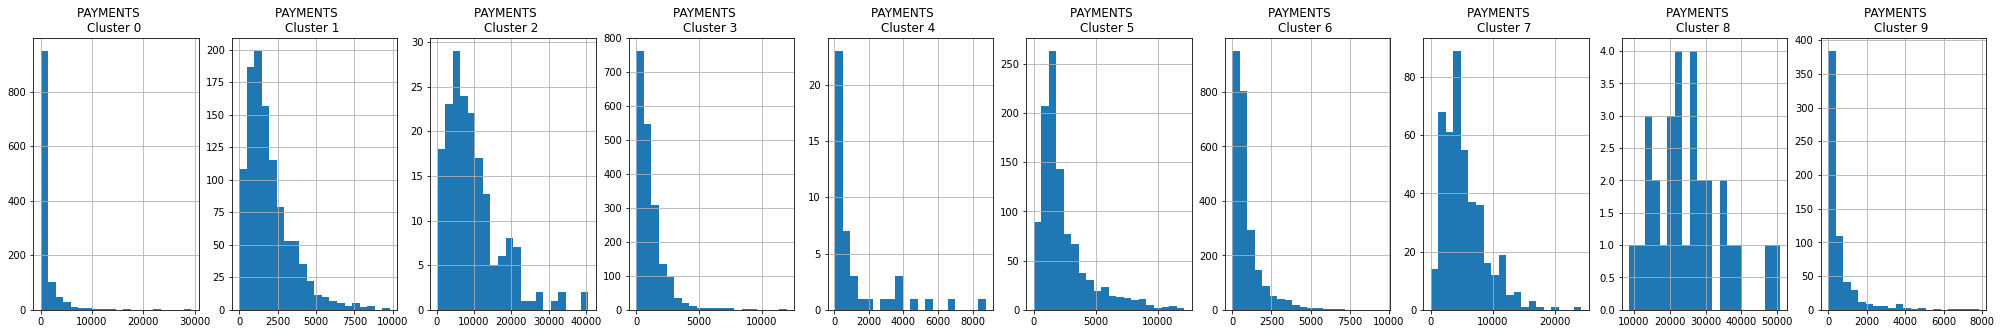

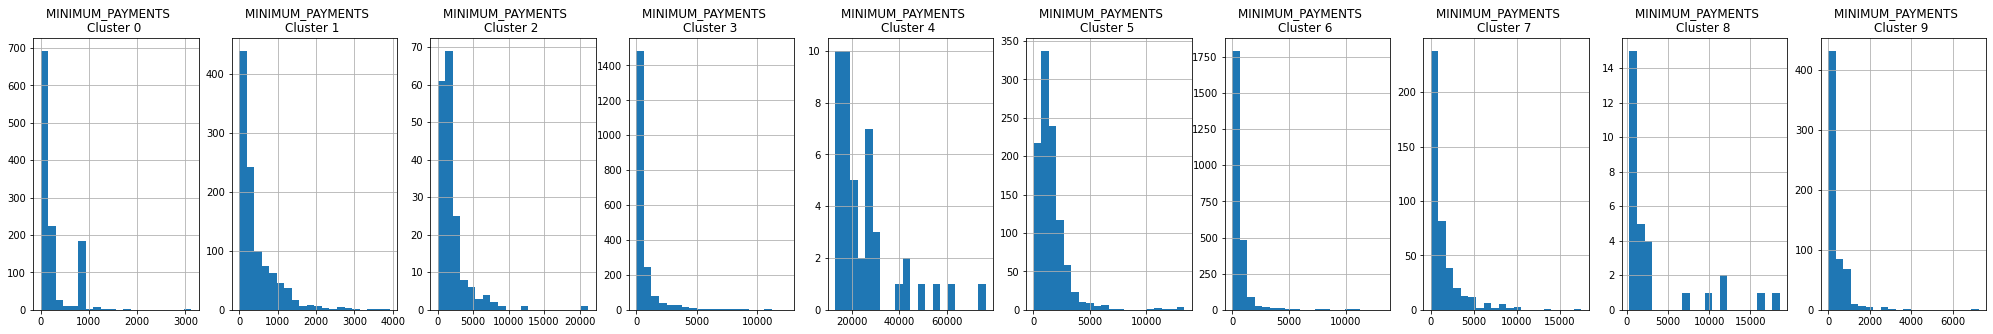

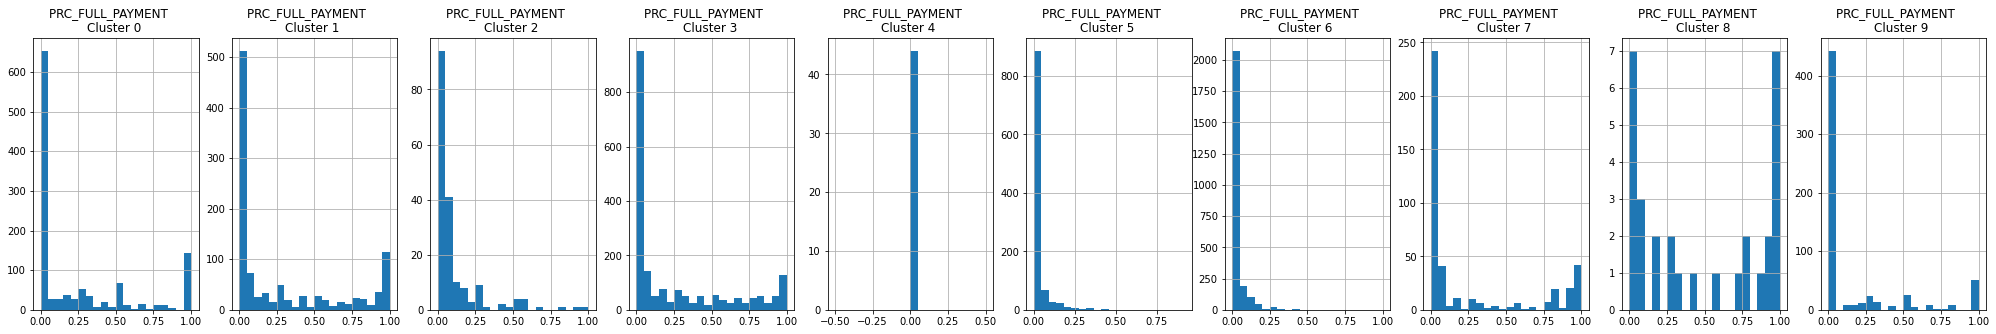

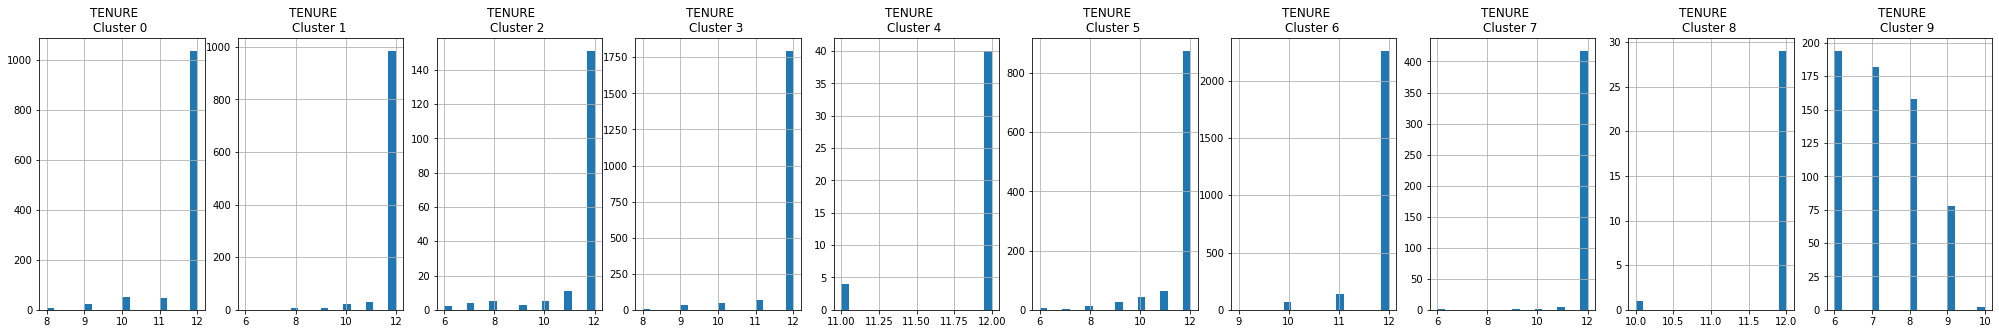

In [ ]:
# Plotting the histogram of various clusters in each feature/column
for feature in customer_df.columns:
  plt.figure(figsize=(35, 5))
  for i in range(10):
    plt.subplot(1, 10, i+1)
    cluster = customer_df_clustered[customer_df_clustered['CLUSTER NO.'] == i]
    cluster[feature].hist(bins=20)
    plt.title(f'{feature}    \nCluster {i} ')

## **Performing Dimensionality Reduction for data visualisation**

### **Using PCA**

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_df_scaled)

pca_df = pd.DataFrame(principal_components, columns = ['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076449
1,-1.138296,2.506477
2,0.969688,-0.383545
3,-0.873627,0.043159
4,-1.599434,-0.688576
...,...,...
8945,-0.359630,-2.016139
8946,-0.564368,-1.639129
8947,-0.926204,-1.810780
8948,-2.336553,-0.657957


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER NO.': labels})], axis=1)
pca_df

,PCA1,PCA2,CLUSTER NO.
0,-1.682220,-1.076449,1
1,-1.138296,2.506477,3
2,0.969688,-0.383545,5
3,-0.873627,0.043159,1
4,-1.599434,-0.688576,1
...,...,...,...
8945,-0.359630,-2.016139,6
8946,-0.564368,-1.639129,6
8947,-0.926204,-1.810780,6
8948,-2.336553,-0.657957,6


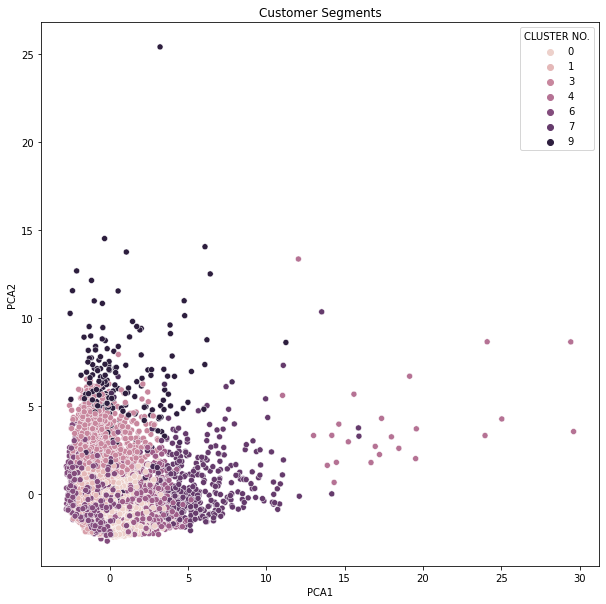

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PCA1", y="PCA2", hue = "CLUSTER NO.", data = pca_df)
plt.title('Customer Segments')
plt.show()

### **Using AutoEncoders to reduce the number of features in the original dataset**

In [25]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error', metrics = ['accuracy'])

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', patience = 10)
mc = ModelCheckpoint('/content/drive/MyDrive/ML Projects/Customer-Segmentation/final_model_1.h5', 
                     monitor='val_loss', save_best_only = True, verbose=1)

# as it is an AutoEncoder, same data will be fed to both the input & output
autoencoder.fit(customer_df_scaled, customer_df_scaled, batch_size = 128, epochs = 200,
                validation_split = 0.2, callbacks = [es, mc], verbose = 1)

Epoch 1/200
56/56 [==============================] - 1s 7ms/step - loss: 0.7353 - accuracy: 0.2235 - val_loss: 0.3663 - val_accuracy: 0.4235

Epoch 00001: val_loss improved from inf to 0.36632, saving model to /content/drive/MyDrive/ML Projects/Customer-Segmentation/final_model_1.h5
Epoch 2/200
56/56 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.4573 - val_loss: 0.2921 - val_accuracy: 0.4603

Epoch 00002: val_loss improved from 0.36632 to 0.29214, saving model to /content/drive/MyDrive/ML Projects/Customer-Segmentation/final_model_1.h5
Epoch 3/200
56/56 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.5144 - val_loss: 0.2465 - val_accuracy: 0.5073

Epoch 00003: val_loss improved from 0.29214 to 0.24652, saving model to /content/drive/MyDrive/ML Projects/Customer-Segmentation/final_model_1.h5
Epoch 4/200
56/56 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.5475 - val_loss: 0.2187 - val_accuracy: 0.5475

### Trained Model Details - 
## **loss: 0.0253 - accuracy: 0.8664 - val_loss: 0.0304 - val_accuracy: 0.8603**

In [27]:
# getting the encoded features from the encoderlayer of the AutoEncoder
encoded_df = encoder.predict(customer_df_scaled)

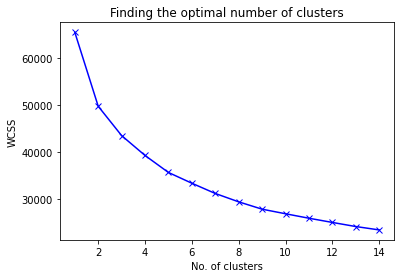

In [28]:
# determining the optimal number of clusters for K-means

number_of_clusters = range(1, 15)
wcss_new = []

for i in number_of_clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(encoded_df)
  wcss_new.append(kmeans.inertia_)

plt.plot(number_of_clusters, wcss_new, 'bx-')
plt.title('Finding the optimal number of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS') 
plt.show()

optimal number of clusters obtained = 5

In [30]:
# applying Kmeans with the optimal no. of clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(encoded_df)
labels_new = kmeans.labels_

In [34]:
# re-applying PCA
pca = PCA(n_components=2)
principal_components_new = pca.fit_transform(encoded_df)

pca_new_df = pd.DataFrame(principal_components_new, columns = ['PCA1', 'PCA2'])
pca_new_df

,PCA1,PCA2
0,-1.696998,-0.217165
1,-0.233001,1.147474
2,-1.125976,-0.979436
3,-1.496156,-0.195811
4,-1.793663,-0.290255
...,...,...
8945,2.448164,1.673060
8946,1.039298,1.449882
8947,1.571136,1.722293
8948,0.487467,2.032178


In [35]:
pca_new_df = pd.concat([pca_new_df,pd.DataFrame({'CLUSTER NO.':labels_new})], axis = 1)
pca_new_df.head()

,PCA1,PCA2,CLUSTER NO.
0,-1.696998,-0.217165,1
1,-0.233001,1.147474,1
2,-1.125976,-0.979436,1
3,-1.496156,-0.195811,1
4,-1.793663,-0.290255,1


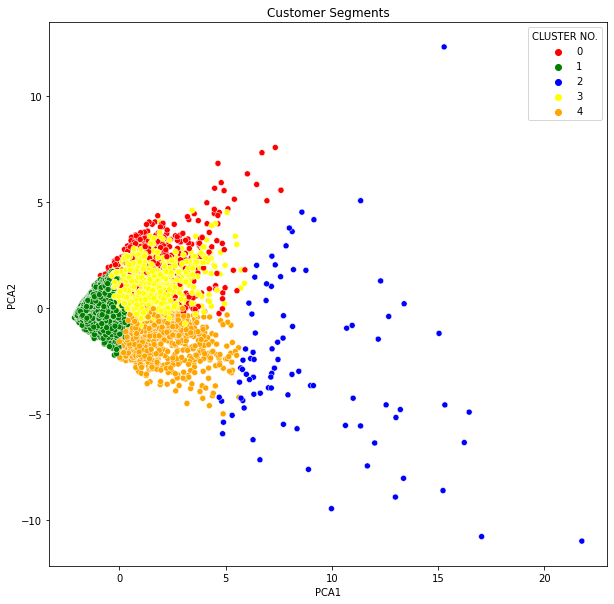

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PCA1", y="PCA2", hue = "CLUSTER NO.", data = pca_new_df, palette =['red','green','blue','yellow', 'orange'])
plt.title('Customer Segments')
plt.show()